In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.embed_dim = embed_dim
        
        # Query, Key, Value matrices
        self.W_q = nn.Linear(embed_dim, embed_dim)
        self.W_k = nn.Linear(embed_dim, embed_dim)
        self.W_v = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        # x shape: (batch, seq_len, embed_dim)
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)
        
        # Attention scores
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.embed_dim ** 0.5)
        attn_weights = F.softmax(scores, dim=-1)
        
        # Weighted values
        output = torch.matmul(attn_weights, V)
        return output, attn_weights

In [5]:
embed_dim = 8
seq_len = 5

x = torch.randn(1, seq_len, embed_dim)  # random input

attn = SelfAttention(embed_dim)
output, weights = attn(x)

output.shape, weights.shape

(torch.Size([1, 5, 8]), torch.Size([1, 5, 5]))

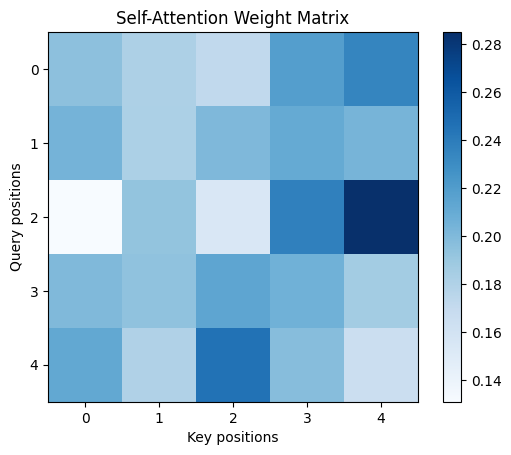

In [6]:
plt.imshow(weights[0].detach(), cmap='Blues')
plt.colorbar()
plt.title("Self-Attention Weight Matrix")
plt.xlabel("Key positions")
plt.ylabel("Query positions")
plt.show()